# Data visualization introduction

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

## 1 - Single line chart
### Dutch TTF prices

In [2]:
ttf_ticker = yf.Ticker("TTF=F")
df_raw = ttf_ticker.history(period="max")
df_ttf = df_raw['Close']

<Axes: xlabel='Date'>

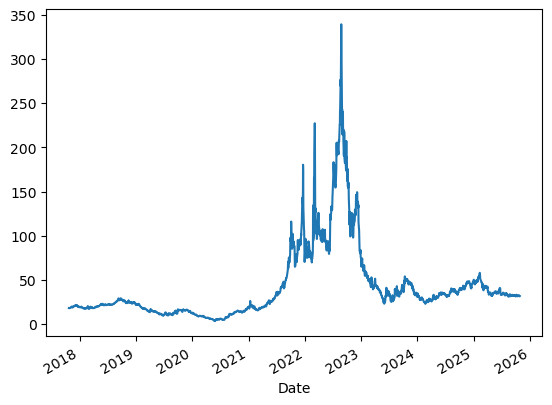

In [3]:
df_ttf.plot()

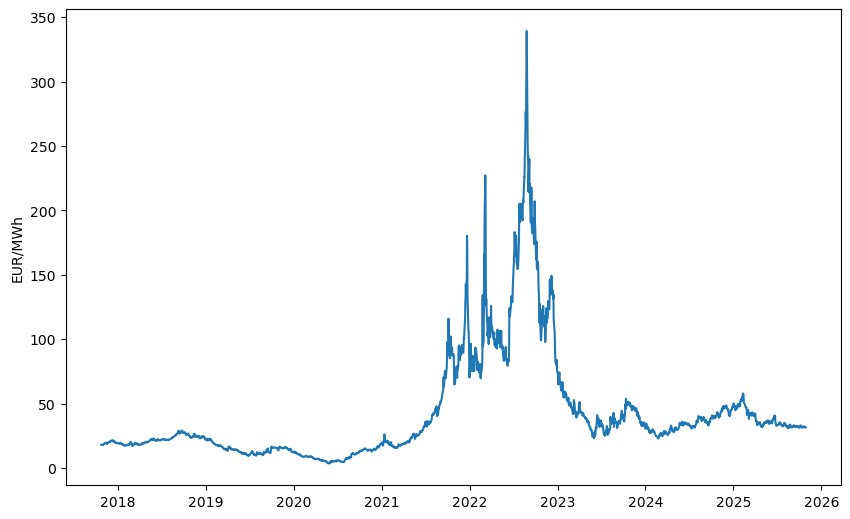

In [4]:
def plot_start(df, x_length = 10):
    
    phi = (1+np.sqrt(5))/2  # Calculate golden ratio for correct proposrtions
    
    # Plot via subplots
    fig, ax = plt.subplots(figsize=(x_length, x_length/phi))

    ax.plot(df)
    ax.set_ylabel('EUR/MWh')
    plt.show()
    
plot_start(df_ttf, x_length=10)

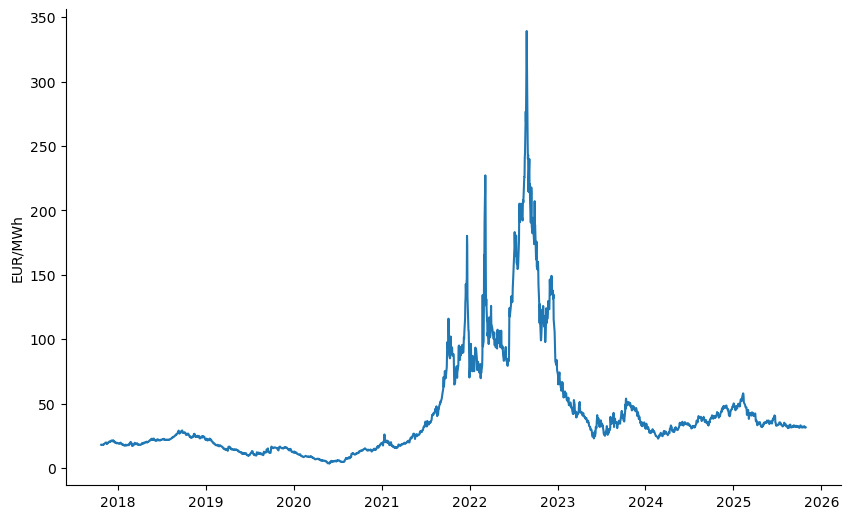

In [5]:

def plot_no_spines(df, x_length = 10):
    
    phi = (1+np.sqrt(5))/2  # Calculate golden ratio for correct proposrtions
    
    # Plot via subplots
    fig, ax = plt.subplots(figsize=(x_length, x_length/phi))

    # Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.plot(df)    
    ax.set_ylabel('EUR/MWh')
    
    # Render the plot
    plt.show()
    
plot_no_spines(df_ttf, x_length=10)

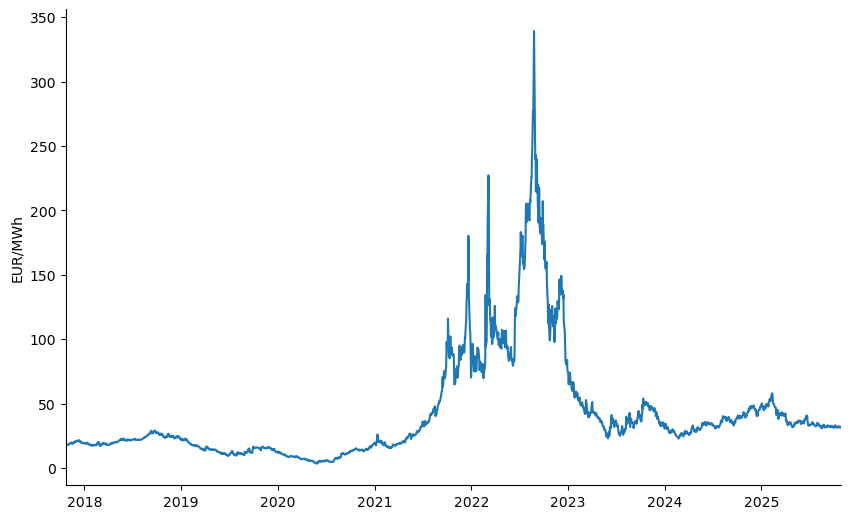

In [6]:

def plot_no_whitespace(df, x_length = 10):
    
    phi = (1+np.sqrt(5))/2  # Calculate golden ratio for correct proposrtions
    
    # Plot via subplots
    fig, ax = plt.subplots(figsize=(x_length, x_length/phi))

    # Plot figure
    ax.plot(df)    
    ax.set_ylabel('EUR/MWh')
    
    # Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Remove whitespace
    ax.set_xlim(df.index.min(), df.index.max())
    
    # Render the plot
    plt.show()
    
plot_no_whitespace(df_ttf, x_length=10)

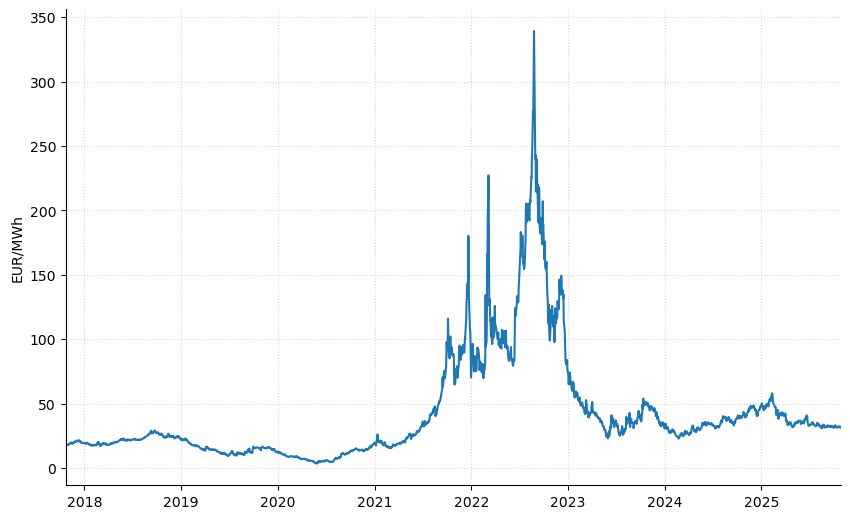

In [7]:

def plot_gridlines(df, x_length = 10, alpha = 0.6):
    
    phi = (1+np.sqrt(5))/2  # Calculate golden ratio for correct proposrtions
    
    # Plot via subplots
    fig, ax = plt.subplots(figsize=(x_length, x_length/phi))

    # Plot figure
    ax.plot(df)    
    ax.set_ylabel('EUR/MWh')
    
    # Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Remove whitespace
    ax.set_xlim(df.index.min(), df.index.max())
    
    # Set gridlines
    ax.grid(linestyle=':', alpha=alpha)
    
    # Render the plot
    plt.show()
    
plot_gridlines(df_ttf, x_length=10, alpha = 0.5)

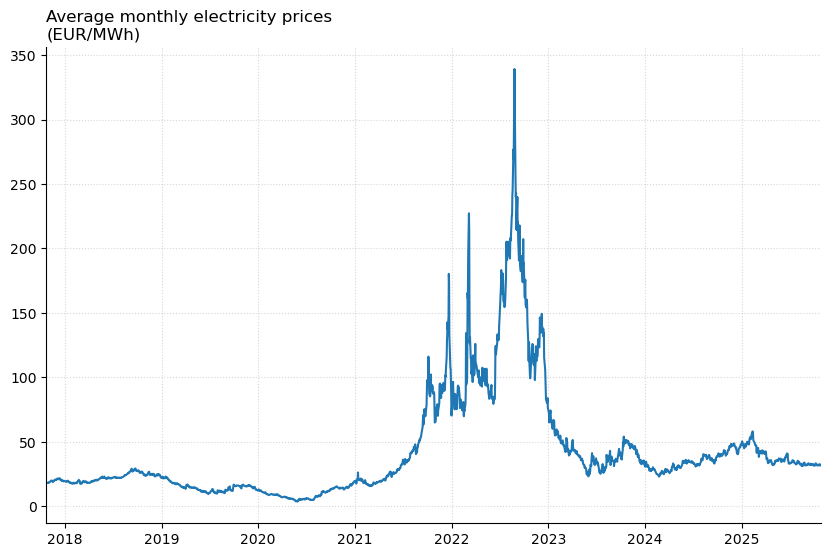

In [8]:

def plot_single_line(df, x_length = 10, alpha = 0.6):
    #plt.style.use("seaborn-v0_8-whitegrid")
    phi = (1+np.sqrt(5))/2  # Calculate golden ratio for correct proposrtions
    
    # Create instance of subplots
    fig, ax = plt.subplots(figsize=(x_length, x_length/phi))
    
    # Plot dataframe
    ax.plot(df, label = 'TTF gas prices')    
    #ax.set_ylabel('EUR/MWh')

    # Set title
    ax.set_title('Average monthly electricity prices\n(EUR/MWh)', loc='left', fontsize=12)
    
    # Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Remove whitespace
    ax.set_xlim(df.index.min(), df.index.max())
    
    # Set gridlines
    ax.grid(linestyle=':', alpha=alpha)
    
    # Legend
    #ax.legend(loc='best', fontsize=10, frameon=True, ncols=2)
    
    # Show plot
    plt.show()
    
plot_single_line(df_ttf, x_length=10, alpha=0.5)



## 2- Multiline chart
### Historical energy prices

In [9]:
file_dir = Path.cwd()  # current working directory

raw_df = pd.read_csv(file_dir / 'data' / 'electricity_prices.csv',index_col=0, parse_dates=True)
df_prices = raw_df.resample('SM').mean()
columns_to_plot = ['DE', 'FR', 'IT', 'ES', 'DK', 'SE']
df_prices = df_prices[columns_to_plot]

C:\Users\mcsr\AppData\Local\Temp\ipykernel_10048\1935767054.py:4: FutureWarning: 'SM' is deprecated and will be removed in a future version, please use 'SME' instead.
  df_prices = raw_df.resample('SM').mean()


<Axes: xlabel='index'>

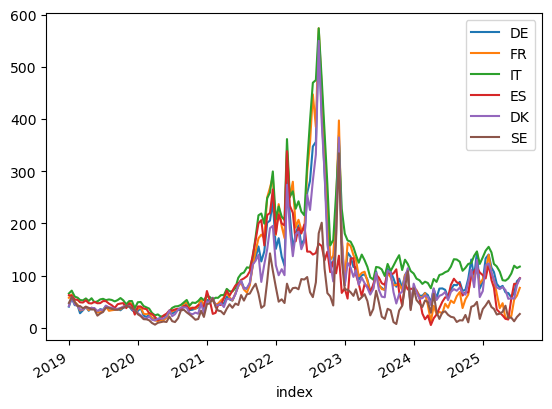

In [10]:
df_prices.plot()

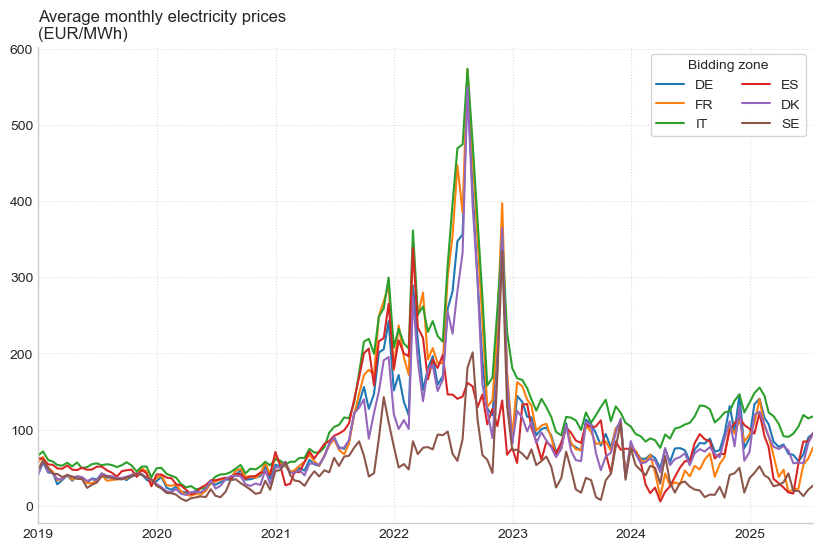

In [11]:
def plot(df, x_length = 10):
    
    phi = (1+np.sqrt(5))/2  # Calculate golden ratio for correct proposrtions
    plt.style.use("seaborn-v0_8-whitegrid")
    # Create instance of subplots
    fig, ax = plt.subplots(figsize=(x_length, x_length/phi))
    
    # Plot dataframe
    ax.plot(df.index, df, label=df.columns)
    
    # Set title
    ax.set_title('Average monthly electricity prices\n(EUR/MWh)', loc='left', fontsize=12)
    
    # Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Remove whitespace
    ax.set_xlim(df.index.min(), df.index.max())
    
    # Set gridlines
    ax.grid(linestyle=':', alpha=0.7)
    
    # Legend
    ax.legend(loc='best', fontsize=10, frameon=True, title='Bidding zone', ncols=2)
    
    # Show plot
    plt.show()
    
plot(df_prices, x_length=10)

In [12]:
import seaborn as sns

def plot(df, x_length=10, palette='colorblind'):
    phi = (1 + np.sqrt(5)) / 2  # Golden ratio for proportions
    plt.style.use("seaborn-v0_8-whitegrid")

    # Apply chosen color palette
    colors = sns.color_palette(palette, n_colors=len(df.columns))

    # Create figure
    fig, ax = plt.subplots(figsize=(x_length, x_length / phi))

    # Plot each series with its own color
    for i, col in enumerate(df.columns):
        ax.plot(df.index, df[col], label=col, color=colors[i], linewidth=1)

    # Title and labels
    ax.set_title('Average monthly electricity prices\n(EUR/MWh)',
                 loc='left', fontsize=12)

    # Style cleanup
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(df.index.min(), df.index.max())
    ax.grid(linestyle=':', alpha=0.7)

    # Legend
    ax.legend(loc='best', fontsize=9, frameon=True,
              title='Bidding zone', ncols=2)

    plt.tight_layout()
    plt.show()



🎨 Rendering palette: colorblind


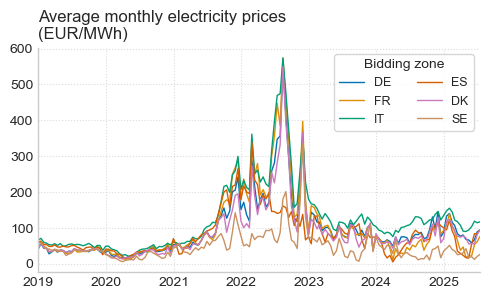


🎨 Rendering palette: pastel


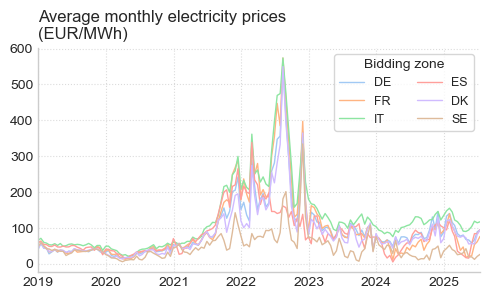


🎨 Rendering palette: deep


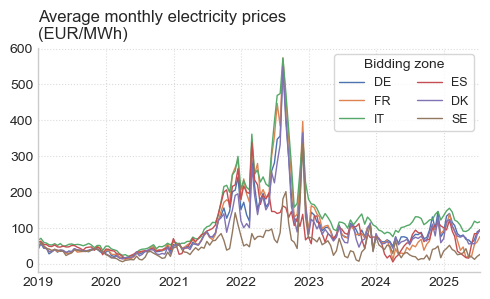


🎨 Rendering palette: dark


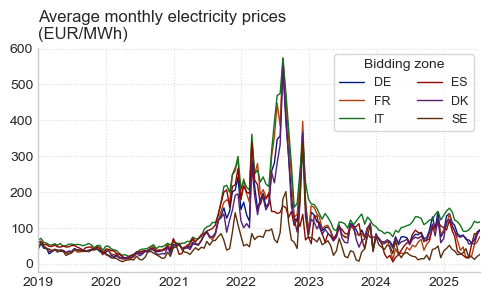


🎨 Rendering palette: coolwarm


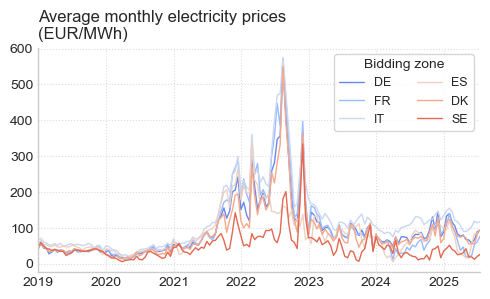


🎨 Rendering palette: muted


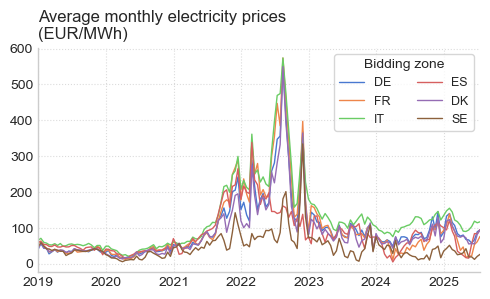


🎨 Rendering palette: Dark2


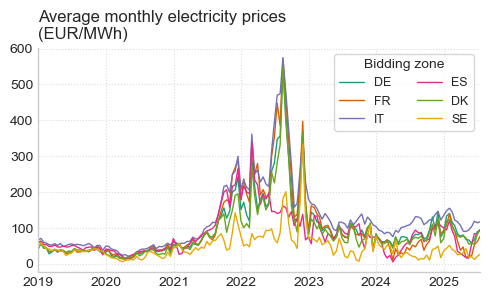


🎨 Rendering palette: Set2


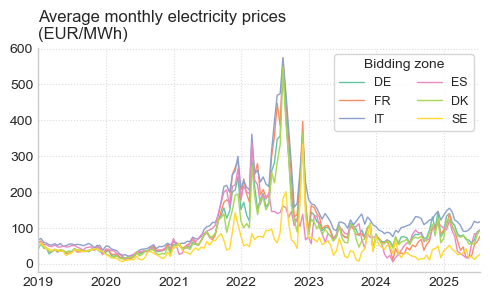


🎨 Rendering palette: tab10


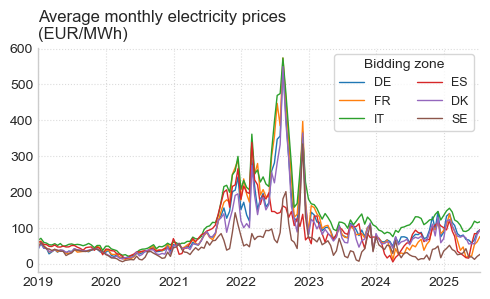

In [13]:
# --- Loop over professional-grade palettes ---
palettes = ['colorblind',
            'pastel',
            'deep',
            'dark',
            'coolwarm',
            'muted',
            'Dark2',
            'Set2',
            'tab10']

for pal in palettes:
    print(f"\n🎨 Rendering palette: {pal}")
    plot(df_prices, x_length=5, palette=pal)

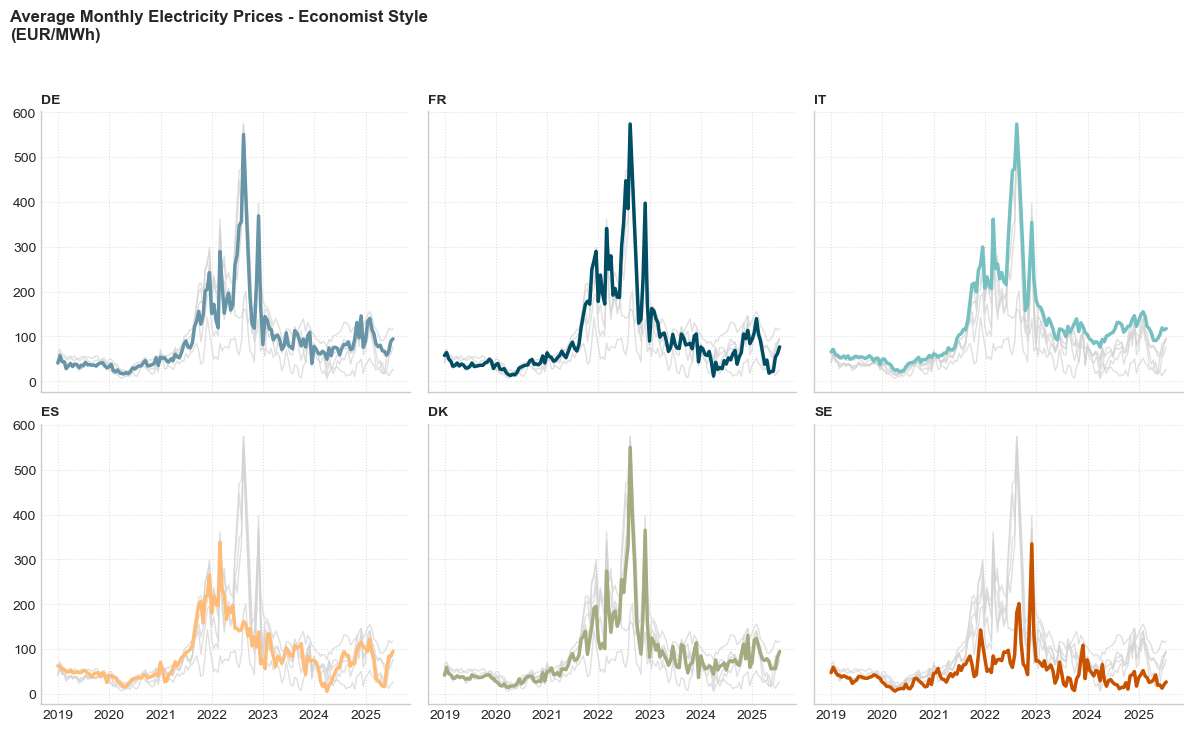

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_economist_style(df, x_length=12):
    # Economist-inspired palette
    economist_palette = ["#6794A7", "#014D64", "#76C0C1",
                         "#FFBC79", "#A5AB81", "#C85200"]

    regions = df.columns[:6]  # first 6 regions
    phi = (1 + np.sqrt(5)) / 2
    plt.style.use("seaborn-v0_8-whitegrid")

    fig, axes = plt.subplots(2, 3, figsize=(x_length, x_length / phi), sharex=True, sharey=True)
    axes = axes.flatten()

    for i, region in enumerate(regions):
        ax = axes[i]

        # Plot all regions in light gray for context
        ax.plot(df.index, df, color='lightgray', linewidth=1.0, alpha=0.7, zorder=1)

        # Highlight the current region
        ax.plot(df.index, df[region],
                color=economist_palette[i % len(economist_palette)],
                linewidth=2.5, zorder=2)

        ax.set_title(region, fontsize=10, fontweight='semibold', loc='left')

        # Clean up chart aesthetics
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.grid(linestyle=':', alpha=0.6)

    # Common labels
    fig.suptitle('Average Monthly Electricity Prices - Economist Style\n(EUR/MWh)',
                 x=0.01, ha='left', fontsize=12, fontweight='bold')

    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

plot_economist_style(df_prices)    

## 3- Barplot electricity prices

In [15]:
bar_df = df_prices[df_prices.index.year == 2023].mean()

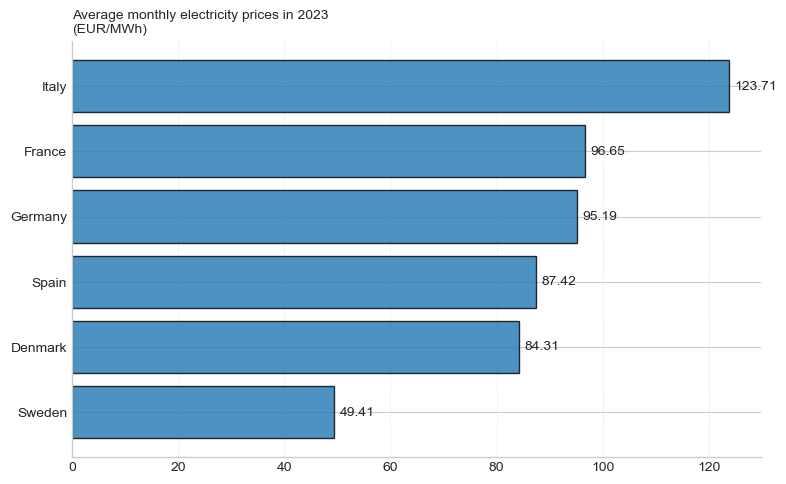

In [16]:
def bar_plot(df, x_length = 10):
    
    phi = (1+np.sqrt(5))/2  # Calculate golden ratio for correct proposrtions
    #plt.style.use("seaborn-v0_8-whitegrid")
    # Create instance of subplots
    
    #sns.set_theme(style="whitegrid")  # Use seaborn theme for clean grid style
    # Mapping country codes to full names
    country_map = {
        'DE': 'Germany',
        'FR': 'France',
        'IT': 'Italy',
        'ES': 'Spain',
        'DK': 'Denmark',
        'SE': 'Sweden'
    }

    # Sort the series by values ascending for horizontal bar plot
    df_sorted = df.sort_values()

    # Map index from codes to full country names
    df_sorted.index = df_sorted.index.map(country_map)

    phi = (1 + np.sqrt(5)) / 2  # Golden ratio

    #sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots(figsize=(x_length, x_length / phi))

    bars = ax.barh(df_sorted.index, df_sorted.values, edgecolor='black', alpha=0.8)

    ax.set_title('Average monthly electricity prices in 2023\n(EUR/MWh)', loc='left', fontsize=10,)


    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.grid(True, axis='x', linestyle=':', linewidth=0.7, alpha=0.7)

    # Annotate the bars with their values
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.2f}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(4, 0),
                    textcoords='offset points',
                    ha='left',
                    va='center',
                    fontsize=10)

    plt.tight_layout()
    plt.show()
    
bar_plot(bar_df, x_length=8)

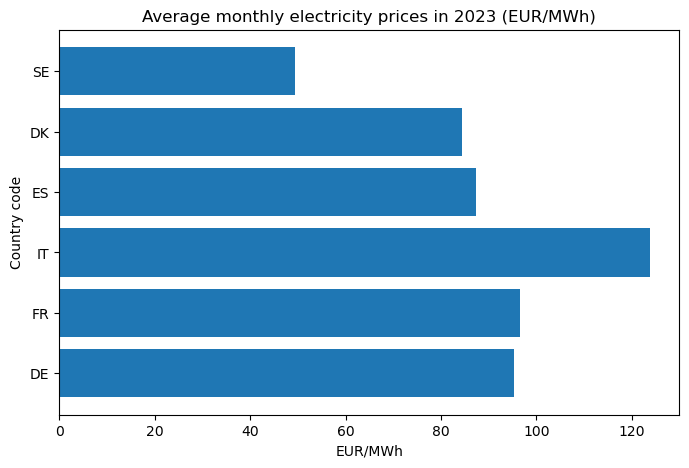

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def bar_plot_basic(df):
    """
    Simple baseline horizontal bar plot.
    Intentionally minimal styling to illustrate default matplotlib aesthetics.
    """
    plt.style.use('default')

    plt.figure(figsize=(8, 5))
    plt.barh(df.index, df.values)
    plt.title("Average monthly electricity prices in 2023 (EUR/MWh)")
    plt.xlabel("EUR/MWh")
    plt.ylabel("Country code")
    plt.show()

bar_plot_basic(bar_df)

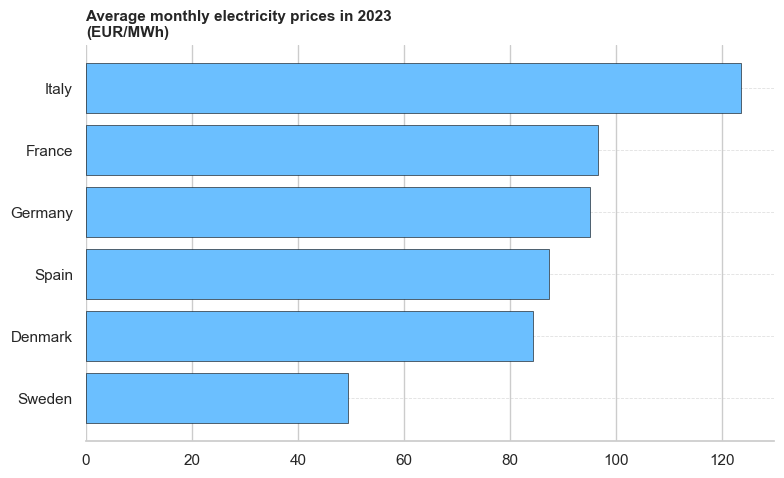

In [60]:
def bar_plot_advanced(df, x_length=10):

    # Golden ratio for proportion
    phi = (1 + np.sqrt(5)) / 2  

    # Map country codes to names
    country_map = {
        'DE': 'Germany',
        'FR': 'France',
        'IT': 'Italy',
        'ES': 'Spain',
        'DK': 'Denmark',
        'SE': 'Sweden'
    }

    # Sort data
    df_sorted = df.sort_values()
    df_sorted.index = df_sorted.index.map(country_map)

    # Identify the max value
    max_idx = df_sorted.values.argmax()

    # Set style
    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots(figsize=(x_length, x_length / phi))

    # Colors: gray for all, strong highlight for max
    base_color = "#6bbfff"      # light gray
    highlight_color = "#6bbfff"  # dark gray or Economist red '#E3120B' if desired

    colors = [base_color] * len(df_sorted)
    colors[max_idx] = highlight_color

    bars = ax.barh(
        df_sorted.index,
        df_sorted.values,
        color=colors,
        edgecolor="black",
        linewidth=0.4,
    )

    # Title formatting
    ax.set_title(
        "Average monthly electricity prices in 2023\n(EUR/MWh)",
        loc="left",
        fontsize=11,
        weight="bold"
    )

    # Minimalist frame
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)


    ax.grid(True, axis='y', linestyle='dashed', linewidth=0.6, alpha=0.6)



    plt.tight_layout()
    plt.show()


bar_plot_advanced(bar_df, x_length=8)  # Refined version

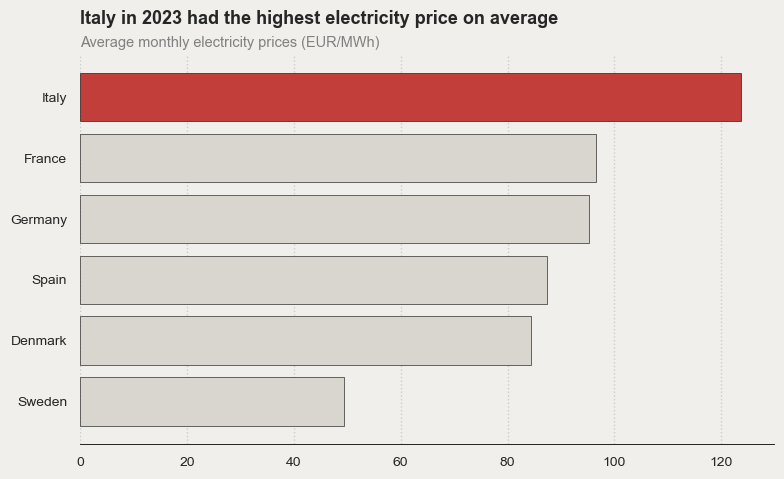

In [69]:
def bar_plot_economist(df, x_length=10):
    """
    Economist-style horizontal bar plot:
    - All bars in neutral gray
    - Highest value highlighted in Economist red
    - Light gray background
    - No legend, no x-axis label
    - Main title and subtitle styling
    """
    phi = (1 + np.sqrt(5)) / 2  # Golden ratio for proportions

    # Country mapping
    country_map = {
        'DE': 'Germany',
        'FR': 'France',
        'IT': 'Italy',
        'ES': 'Spain',
        'DK': 'Denmark',
        'SE': 'Sweden'
    }

    # Sort and rename
    df_sorted = df.sort_values()
    df_sorted.index = df_sorted.index.map(country_map)

    # Identify highest
    max_idx = df_sorted.values.argmax()
    max_country = df_sorted.index[max_idx]
    max_value = df_sorted.values[max_idx]

    # Base style
    sns.set_theme(style="white")
    fig, ax = plt.subplots(figsize=(x_length, x_length / phi))
    fig.patch.set_facecolor("#f0efeb")  # light gray background
    ax.set_facecolor("#f0efeb")

    # Colors
    base_color = "#d9d6cf"
    highlight_color = "#C23E3A"
    colors = [base_color] * len(df_sorted)
    colors[max_idx] = highlight_color

    # Bars
    bars = ax.barh(
        df_sorted.index,
        df_sorted.values,
        color=colors,
        edgecolor="black",
        linewidth=0.4,
    )

    # Titles
    ax.text(
        0, 1.08,
        f"{max_country} in 2023 had the highest electricity price on average",
        fontsize=13,
        weight="bold",
        transform=ax.transAxes,
        ha="left",
    )
    ax.text(
        0, 1.02,
        "Average monthly electricity prices (EUR/MWh)",
        fontsize=10.5,
        color="gray",
        transform=ax.transAxes,
        ha="left",
    )

    # Grid only on x-axis
    ax.grid(True, axis='x', linestyle=':', linewidth=1, alpha=1)
    #ax.set_axisbelow(True)

    # Keep x-axis visible (Economist-style baseline)
    ax.spines['bottom'].set_visible(True)
    ax.spines['bottom'].set_color("black")
    ax.spines['bottom'].set_linewidth(0.6)

    # Hide the rest of the spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # X-axis formatting
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
    
    plt.tight_layout()
    plt.show()

bar_plot_economist(bar_df, x_length=8)  # Refined version

## 4 - Scatterplot

In [77]:
df_scatter_raw = pd.read_csv(file_dir / 'data' / 'scatterplot_DK.csv',index_col=0, parse_dates=True)
df_scatter = df_scatter_raw[df_scatter_raw.index.year.isin([2021, 2022, 2023, 2024])]
df_scatter

,price,CO2,solar,wind_on,wind_off,total_res
2021-01-01 00:00:00+00:00,25.12,125.91,0.0,165.0,167.0,332
2021-01-01 01:00:00+00:00,24.01,111.82,0.0,157.0,142.0,299
2021-01-01 02:00:00+00:00,24.81,108.75,0.0,121.0,119.0,240
2021-01-01 03:00:00+00:00,24.43,111.82,0.0,113.0,97.0,210
2021-01-01 04:00:00+00:00,27.18,119.12,0.0,91.0,77.0,168
...,...,...,...,...,...,...
2024-12-31 19:00:00+00:00,NaN,16.49,0.0,945.0,531.0,1476
2024-12-31 20:00:00+00:00,NaN,12.29,0.0,948.0,538.0,1486
2024-12-31 21:00:00+00:00,NaN,16.25,0.0,942.0,545.0,1487
2024-12-31 22:00:00+00:00,NaN,20.29,0.0,940.0,534.0,1474


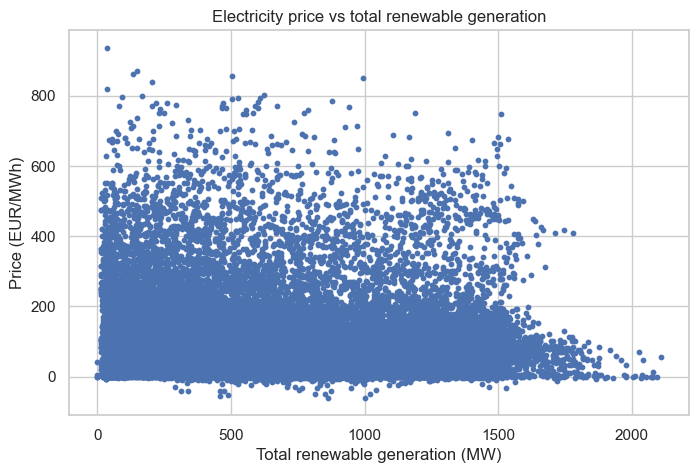

In [78]:
def scatter_basic(df):
    """
    Simple, unstyled scatter plot.
    Illustrates price vs. total renewables without any aesthetic tuning.
    """
    plt.figure(figsize=(8, 5))
    plt.scatter(df['total_res'], df['price'], s=10)
    plt.title("Electricity price vs total renewable generation")
    plt.xlabel("Total renewable generation (MW)")
    plt.ylabel("Price (EUR/MWh)")
    plt.show()
    
scatter_basic(df_scatter)

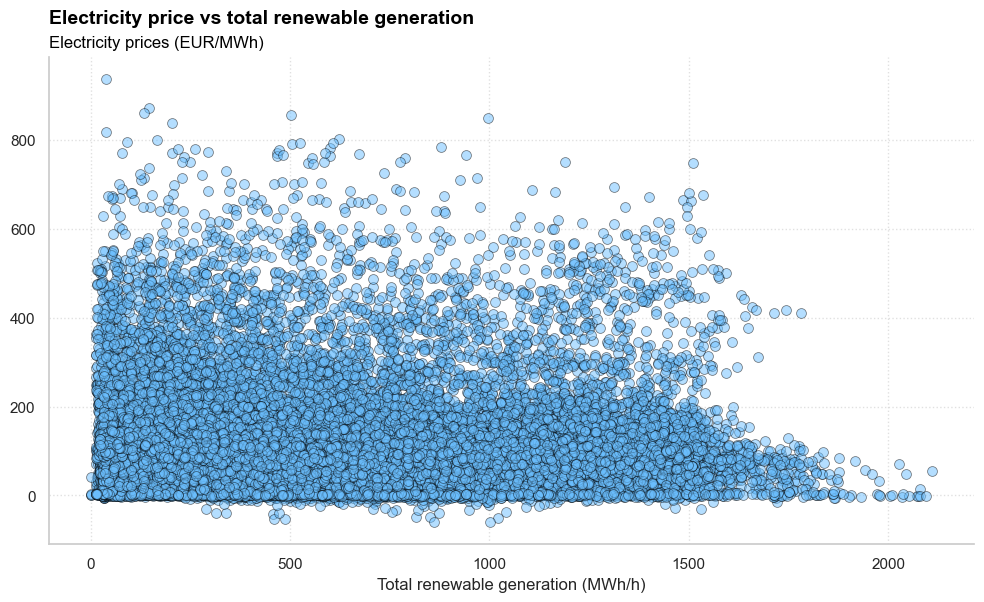

In [113]:
def scatter_advanced(df, x_col, y_col, hue_col=None):
    """
    Advanced scatter plot:
    - Clean whitegrid style
    - Black-edged points
    - Optional color hue
    - Title and frame similar to bar_plot_advanced
    """
    sns.set_theme(style="whitegrid")
    phi = (1 + np.sqrt(5)) / 2
    fig, ax = plt.subplots(figsize=(10, 10 / phi))

    if hue_col:
        sns.scatterplot(
            data=df,
            x=x_col,
            y=y_col,
            hue=hue_col,
            palette="coolwarm",
            edgecolor="black",
            s=50,
            alpha=0.8,
            ax=ax
        )
        ax.legend(title=hue_col, frameon=False)
    else:
        sns.scatterplot(
            data=df,
            x=x_col,
            y=y_col,
            color="#6bbfff",
            edgecolor="black",
            s=50,
            alpha=0.5,
            ax=ax
        )

 
    ax.text(
        0, 1.07,
        "Electricity price vs total renewable generation",
        fontsize=14,
        weight="bold",
        transform=ax.transAxes,
        ha="left",
        color="black"
    )
        
    ax.text(
        0, 1.02,
        "Electricity prices (EUR/MWh)",
        fontsize=12,
        color="black",
        transform=ax.transAxes,
        ha="left",
    )
        
    ax.set_xlabel('Total renewable generation (MWh/h)')
    ax.set_ylabel("", fontsize=10)

    # Remove top/right spines for minimalist look
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.grid(True, axis="both", linestyle=":", alpha=0.6)
    plt.tight_layout()
    plt.show()


scatter_advanced(df_scatter, x_col='total_res', y_col='price')